```
Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Due:          07/06/2020
Name:         David Weon
Worked with:  Adam Rauckhorst, Dyllan Usher

Notebook has been cleaned using nbextension 'Code prettify'
```

# Challenge 1 - Import a Few Data Files and Combine

In [1]:
import pandas as pd
df1 = pd.read_csv('turnstile_200606.txt')
df2 = pd.read_csv('turnstile_200613.txt')
df3 = pd.read_csv('turnstile_200620.txt')
df4 = pd.concat([df1, df2, df3])
df4

C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0        A002  R051  02-00-00          59 ST  NQR456W      BMT  05/30/2020   
1        A002  R051  02-00-00          59 ST  NQR456W      BMT  05/30/2020   
2        A002  R051  02-00-00          59 ST  NQR456W      BMT  05/30/2020   
3        A002  R051  02-00-00          59 ST  NQR456W      BMT  05/30/2020   
4        A002  R051  02-00-00          59 ST  NQR456W      BMT  05/30/2020   
...       ...   ...       ...            ...      ...      ...         ...   
206734  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  06/19/2020   
206735  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  06/19/2020   
206736  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  06/19/2020   
206737  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  06/19/2020   
206738  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  06/19/2020   

            TIME     DESC  ENTRIES  \
0       00:00:00  REGULAR  7419887   
1       04:00:00  REGULAR  7419888   
2       08:00:00  REGULAR  7419895   
3       12:00:00  REGULAR  7419911   
4       16:00:00  REGULAR  7419940   
...          ...      ...      ...   
206734  05:00:00  REGULAR     5554   
206735  09:00:00  REGULAR     5554   
206736  13:00:00  REGULAR     5554   
206737  17:00:00  REGULAR     5554   
206738  21:00:00  REGULAR     5554   

        EXITS                                                                 
0                                                 2520505                     
1                                                 2520505                     
2                                                 2520514                     
3                                                 2520531                     
4                                                 2520553                     
...                                                   ...                     
206734                                                514                     
206735                                                514                     
206736                                                514                     
206737                                                514                     
206738                                                514                     

[621293 rows x 11 columns]

In [2]:
df4.reset_index(inplace=True)

In [3]:
df4.columns = [column.strip() for column in df4.columns]

# Challenge 2 - Create a Datetime Column

In [4]:
type(df4['DATE'])

pandas.core.series.Series

In [5]:
type(df4['TIME'])

pandas.core.series.Series

In [6]:
pd.to_datetime(df4['DATE'] + ' ' + df4['TIME'])

0        2020-05-30 00:00:00
1        2020-05-30 04:00:00
2        2020-05-30 08:00:00
3        2020-05-30 12:00:00
4        2020-05-30 16:00:00
                 ...        
621288   2020-06-19 05:00:00
621289   2020-06-19 09:00:00
621290   2020-06-19 13:00:00
621291   2020-06-19 17:00:00
621292   2020-06-19 21:00:00
Length: 621293, dtype: datetime64[ns]

In [7]:
df4['DATETIME'] = pd.to_datetime(df4['DATE'] + ' ' + df4['TIME'],
                                 format="%m/%d/%Y %H:%M:%S")

# Challenge 3 - Daily Entries for Each Turnstile

In [8]:
#checking for duplicates
(df4.groupby(["C/A", "UNIT", "SCP", "STATION",
              "DATETIME"]).ENTRIES.count().reset_index().sort_values(
                  "ENTRIES", ascending=False).head())

C/A  UNIT       SCP         STATION            DATETIME  ENTRIES
0       A002  R051  02-00-00           59 ST 2020-05-30 00:00:00        1
414189  R138  R293  00-06-00  34 ST-PENN STA 2020-06-01 18:00:00        1
414191  R138  R293  00-06-00  34 ST-PENN STA 2020-06-02 02:00:00        1
414192  R138  R293  00-06-00  34 ST-PENN STA 2020-06-02 06:00:00        1
414193  R138  R293  00-06-00  34 ST-PENN STA 2020-06-02 10:00:00        1

In [9]:
#drop unneeded columns
df4 = df4.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [10]:
#first value for each day
turnstiles_daily = (df4.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],
                                as_index=False).ENTRIES.first())

In [11]:
#shifting entries to create current and previous day entries
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily.groupby(
    ["C/A", "UNIT", "SCP",
     "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [12]:
#dropping the first row for NaN value
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [13]:
#checking if some counters are in reverse
turnstiles_daily[
    turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

C/A  UNIT       SCP     STATION        DATE    ENTRIES   PREV_DATE  \
798  A011  R080  01-03-00  57 ST-7 AV  05/31/2020  885664857  05/30/2020   
799  A011  R080  01-03-00  57 ST-7 AV  06/01/2020  885664810  05/31/2020   
800  A011  R080  01-03-00  57 ST-7 AV  06/02/2020  885664701  06/01/2020   
801  A011  R080  01-03-00  57 ST-7 AV  06/03/2020  885664602  06/02/2020   
802  A011  R080  01-03-00  57 ST-7 AV  06/04/2020  885664496  06/03/2020   

     PREV_ENTRIES  
798   885664914.0  
799   885664857.0  
800   885664810.0  
801   885664701.0  
802   885664602.0

In [14]:
import datetime

mask = ((df4["C/A"] == "A011") & (df4["UNIT"] == "R080") &
        (df4["SCP"] == "01-03-00") & (df4["STATION"] == "57 ST-7 AV") &
        (df4["DATETIME"].dt.date == datetime.datetime(2020, 5, 30).date()))
df4[mask].head()

index   C/A  UNIT       SCP     STATION LINENAME DIVISION        DATE  \
1596   1596  A011  R080  01-03-00  57 ST-7 AV     NQRW      BMT  05/30/2020   
1597   1597  A011  R080  01-03-00  57 ST-7 AV     NQRW      BMT  05/30/2020   
1598   1598  A011  R080  01-03-00  57 ST-7 AV     NQRW      BMT  05/30/2020   
1599   1599  A011  R080  01-03-00  57 ST-7 AV     NQRW      BMT  05/30/2020   
1600   1600  A011  R080  01-03-00  57 ST-7 AV     NQRW      BMT  05/30/2020   

          TIME    ENTRIES            DATETIME  
1596  00:00:00  885664914 2020-05-30 00:00:00  
1597  04:00:00  885664912 2020-05-30 04:00:00  
1598  08:00:00  885664907 2020-05-30 08:00:00  
1599  12:00:00  885664900 2020-05-30 12:00:00  
1600  16:00:00  885664884 2020-05-30 16:00:00

In [15]:
#finding the stations that have this reverse counter problem
(turnstiles_daily[
    turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].groupby(
        ["C/A", "UNIT", "SCP", "STATION"]).size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         20
A025  R023  01-03-01  34 ST-HERALD SQ    20
A049  R088  02-05-00  CORTLANDT ST        4
A050  R088  00-05-01  CORTLANDT ST        1
A066  R118  00-00-00  CANAL ST           20
                                         ..
R511  R091  00-03-01  36 AV               1
R523  R147  00-00-04  61 ST WOODSIDE     20
R609  R056  01-03-00  NEVINS ST           1
R622  R123  00-00-00  FRANKLIN AV        20
R730  R431  00-00-04  EASTCHSTER/DYRE    20
Length: 75, dtype: int64

In [16]:
'''
goal is to account for counters in reverse and also counters that reset
'''


def get_daily_counts(row, max_counter):
    '''
    function compares current entries and previous entries to determine
    if counter is in reverse and/or counter has reset
    '''
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0?
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter


# If counter is > 100000, then the counter might have been reset.
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts,
                                                           axis=1,
                                                           max_counter=100000)

9 563308.0
136 8235039.0
43 572778.0
18 2090862.0
98 1200414.0
2555909 514061.0
37 6871440.0
5 235111076.0
16 1098379.0
40 297222.0
917548 9259448.0
11 110832.0
17580 241931.0
242021 17580.0
32 183579.0
21 216974.0
327738 17046.0
53 249030.0
6 6362738.0
264 371906.0
14 795582.0
28 4362577.0
6118023 39945.0


In [17]:
#checking upper bound of daily entries
turnstiles_daily.DAILY_ENTRIES.describe(percentiles=[0.99])

count    98681.000000
mean       153.481916
std        517.795086
min          0.000000
50%         92.000000
99%        819.000000
max      83545.000000
Name: DAILY_ENTRIES, dtype: float64

In [18]:
#dropping daily entries over 6000
#   meaning people are going through the turnstile every other second
#   this is still generous

mask = (turnstiles_daily.DAILY_ENTRIES <= 6000)
turnstiles_daily = turnstiles_daily[mask]
turnstiles_daily.describe()

ENTRIES  PREV_ENTRIES  DAILY_ENTRIES
count  9.866900e+04  9.866900e+04   98669.000000
mean   4.315253e+07  4.315517e+07     149.056634
std    2.195737e+08  2.195745e+08     177.374094
min    0.000000e+00  0.000000e+00       0.000000
25%    2.976500e+05  2.980810e+05      20.000000
50%    1.832334e+06  1.832335e+06      92.000000
75%    6.468519e+06  6.468985e+06     211.000000
max    2.128761e+09  2.128761e+09    1692.000000

# Challenge 4 - Plotting a Single Turnstile

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')

In [20]:
#selecting one turnstile
filt = ((turnstiles_daily['C/A'] == 'A002')
        & (turnstiles_daily['UNIT'] == 'R051')
        & (turnstiles_daily['SCP'] == '02-00-00')
        & (turnstiles_daily['STATION'] == '59 ST'))

Text(0.5, 1.0, 'Traffic at Turnstile A002 R051 02-00-00 59 ST')

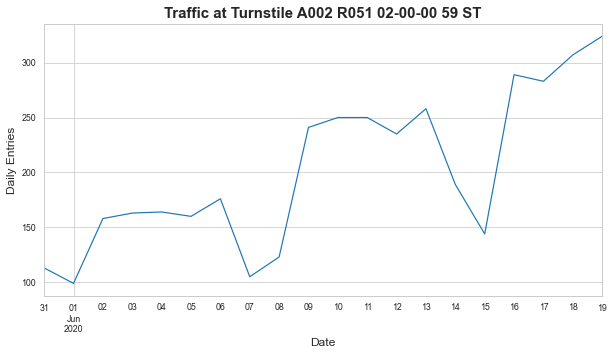

In [21]:
#plotting the daily entries for the selected turnstile
turnstiles_daily['DATE'] = pd.to_datetime(turnstiles_daily['DATE'])
turnstiles_daily[filt].plot(x='DATE',
                            y='DAILY_ENTRIES',
                            kind='line',
                            figsize=(10, 5),
                            legend=False)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Entries', fontsize=12)
plt.title('Traffic at Turnstile A002 R051 02-00-00 59 ST',
          fontsize=15,
          weight='bold')

# Challenge 5 - Single Turnstile as ControlArea/Unit/Station

In [22]:
#selecting one turnstile as ControlArea/Unit/Station combination
turnstiles_daily.groupby(['C/A', 'UNIT', 'STATION',
                          'DATE']).DAILY_ENTRIES.sum()

C/A    UNIT  STATION        DATE      
A002   R051  59 ST          2020-05-31    1001.0
                            2020-06-01     752.0
                            2020-06-02    1526.0
                            2020-06-03    1630.0
                            2020-06-04    1511.0
                                           ...  
TRAM2  R469  RIT-ROOSEVELT  2020-06-15    1525.0
                            2020-06-16    1022.0
                            2020-06-17    1019.0
                            2020-06-18    1019.0
                            2020-06-19    1085.0
Name: DAILY_ENTRIES, Length: 14964, dtype: float64

# Challenge 6 - Daily Entries by Station

In [23]:
#daily entries per station
turnstiles_daily.groupby(['STATION', 'DATE']).DAILY_ENTRIES.sum()

STATION    DATE      
1 AV       2020-05-31    1335.0
           2020-06-01    1073.0
           2020-06-02    2260.0
           2020-06-03    2346.0
           2020-06-04    2306.0
                          ...  
ZEREGA AV  2020-06-15     253.0
           2020-06-16     589.0
           2020-06-17     509.0
           2020-06-18     619.0
           2020-06-19     602.0
Name: DAILY_ENTRIES, Length: 7577, dtype: float64

# Challenge 7 - Plotting Daily Entries by Station

In [24]:
stations = turnstiles_daily.groupby(['STATION', 'DATE'
                                     ]).DAILY_ENTRIES.sum().reset_index()

In [25]:
#selecting one station
filt2 = (stations['STATION'] == '1 AV')

Text(0.5, 1.0, 'Traffic at 1 AV Station')

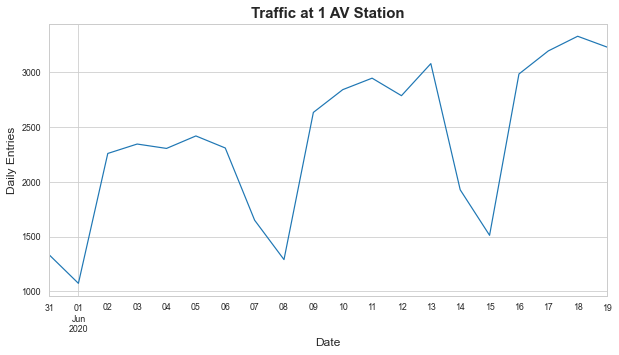

In [26]:
#plotting daily entries for selected station
stations['DATE'] = pd.to_datetime(stations['DATE'])
stations[filt2].plot(x='DATE',
                     y='DAILY_ENTRIES',
                     kind='line',
                     figsize=(10, 5),
                     legend=False)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Entries', fontsize=12)
plt.title('Traffic at 1 AV Station', fontsize=15, weight='bold')

# Challenge 8 - Comparing Weeks at a Station

In [27]:
#adding day of week and week number columns
stations['DATE'] = pd.to_datetime(stations['DATE'])
stations['DAY'] = stations['DATE'].dt.dayofweek
stations['DATE'].dt.week
stations['WEEK_NUMBER'] = stations['DATE'].dt.week
stations.head()

STATION       DATE  DAILY_ENTRIES  DAY  WEEK_NUMBER
0    1 AV 2020-05-31         1335.0    6           22
1    1 AV 2020-06-01         1073.0    0           23
2    1 AV 2020-06-02         2260.0    1           23
3    1 AV 2020-06-03         2346.0    2           23
4    1 AV 2020-06-04         2306.0    3           23

In [28]:
first_av = stations[filt2]

In [29]:
#defining week 23
week23_start = '2020-06-01'
week23_end = '2020-06-07'
week23 = (first_av['DATE'] >= week23_start) & (first_av['DATE'] <= week23_end)
week23_df = first_av.loc[week23]

In [30]:
week23_count_list = []
for elem in week23_df['DAILY_ENTRIES']:
    week23_count_list.append(elem)

week23_count_list

[1073.0, 2260.0, 2346.0, 2306.0, 2420.0, 2310.0, 1650.0]

In [31]:
#defining week 24
week24_start = '2020-06-08'
week24_end = '2020-06-14'
week24 = (first_av['DATE'] >= week24_start) & (first_av['DATE'] <= week24_end)
week24_df = first_av.loc[week24]

In [32]:
week24_count_list = []
for elem in week24_df['DAILY_ENTRIES']:
    week24_count_list.append(elem)

week24_count_list

[1290.0, 2635.0, 2843.0, 2948.0, 2788.0, 3081.0, 1928.0]

In [33]:
#defining week 25
week25_start = '2020-06-15'
week25_end = '2020-06-21'
week25 = (first_av['DATE'] >= week25_start) & (first_av['DATE'] <= week25_end)
week25_df = first_av.loc[week25]

In [34]:
week25_count_list = []
for elem in week25_df['DAILY_ENTRIES']:
    week25_count_list.append(elem)

week25_count_list

[1512.0, 2986.0, 3197.0, 3331.0, 3232.0]

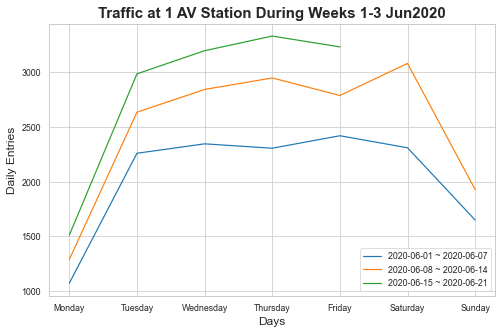

In [35]:
#plotting daily entries over three weeks
plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 7, 1), [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])
plt.xlabel('Days', fontsize=12)
plt.ylabel('Daily Entries', fontsize=12)
plt.title('Traffic at 1 AV Station During Weeks 1-3 Jun2020',
          fontsize=15,
          weight='bold')
plt.plot(week23_count_list, label='2020-06-01 ~ 2020-06-07')
plt.plot(week24_count_list, label='2020-06-08 ~ 2020-06-14')
plt.plot(week25_count_list, label='2020-06-15 ~ 2020-06-21')
plt.legend(loc='lower right')

# Challenge 9 - Finding Stations with Highest Traffic

In [36]:
#total traffic per station
riders_perstation = stations.groupby(['STATION']).DAILY_ENTRIES.sum()
riders_perstation.sort_values(ascending=False)

STATION
125 ST             263462.0
34 ST-PENN STA     256182.0
42 ST-PORT AUTH    207645.0
86 ST              203688.0
34 ST-HERALD SQ    190229.0
                     ...   
BEACH 98 ST          2108.0
BEACH 105 ST         1673.0
BROAD CHANNEL        1038.0
AQUEDUCT RACETR       481.0
ORCHARD BEACH           0.0
Name: DAILY_ENTRIES, Length: 379, dtype: float64

In [37]:
#stations sorted by total traffic
sorted_riders_perstation = riders_perstation.sort_values(ascending=False)

# Challenge 10 - Plotting Total Traffic

In [38]:
#list of total traffic per station
riders_perstation_list = []
for elem in riders_perstation:
    riders_perstation_list.append(elem)

<Figure size 720x216 with 0 Axes>

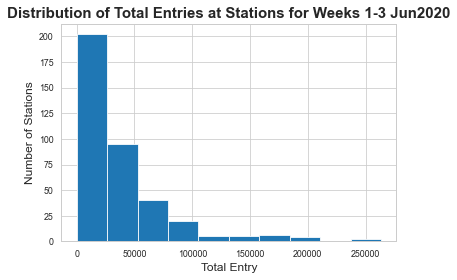

<Figure size 720x216 with 0 Axes>

In [39]:
#plotting distribution of total traffic
plt.hist(riders_perstation_list)
plt.xlabel('Total Entry', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.title('Distribution of Total Entries at Stations for Weeks 1-3 Jun2020',
          fontsize=15,
          weight='bold')
plt.figure(figsize=(10, 3))

In [40]:
riders_perstation = riders_perstation.reset_index()

Text(0.5, 1.0, 'Traffic at Stations for Weeks 1-3 Jun2020')

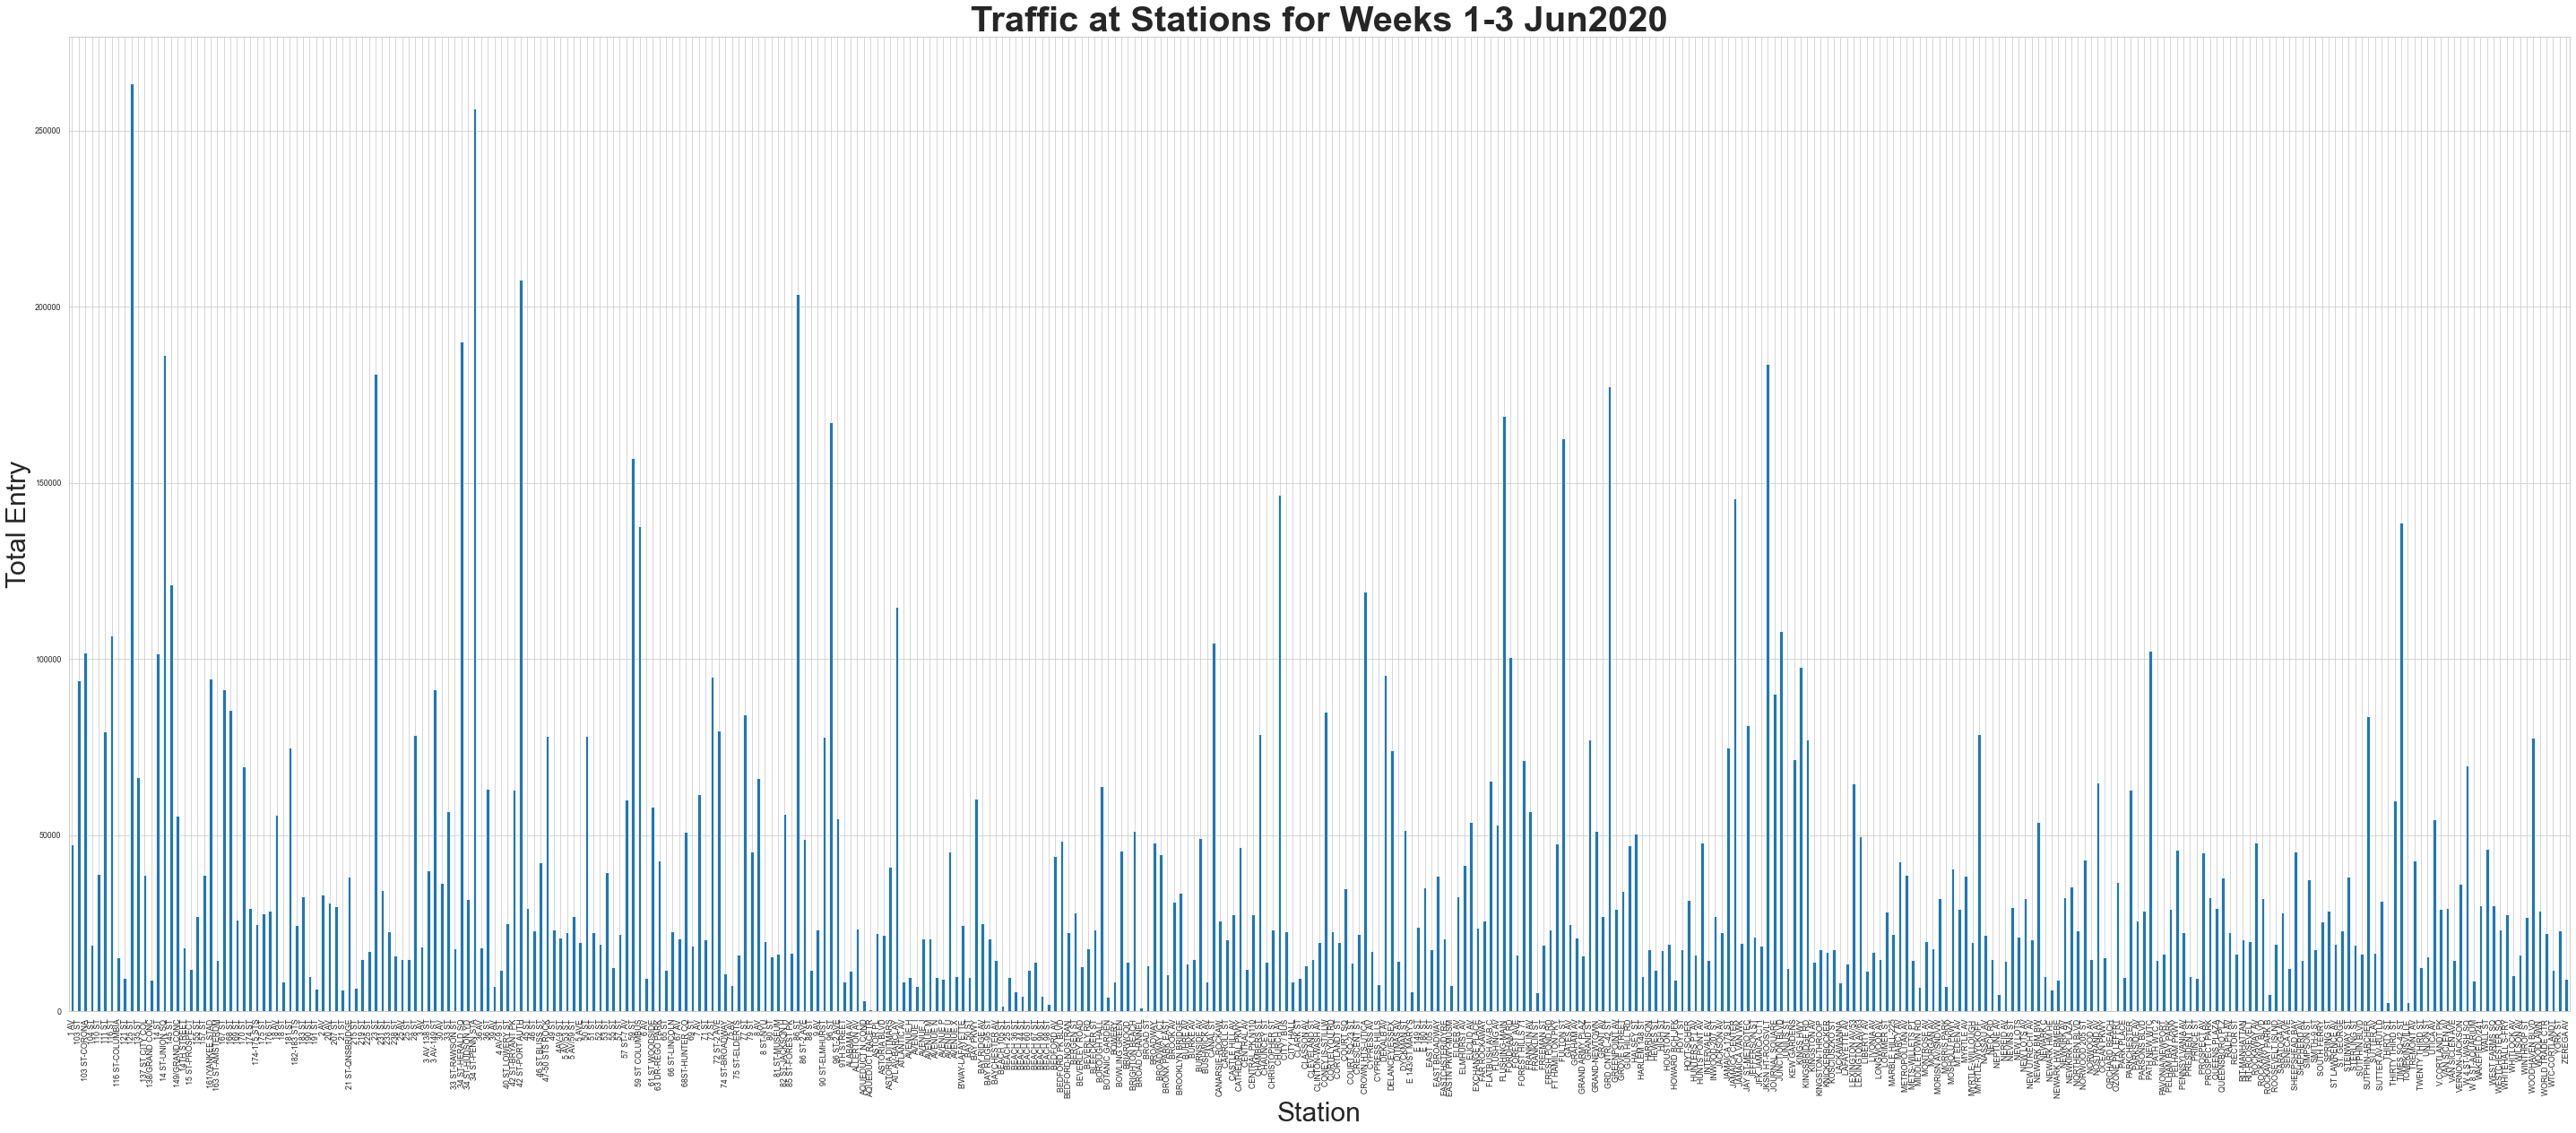

In [41]:
#plotting each station and its total traffic
(riders_perstation.plot(x='STATION',
                        y='DAILY_ENTRIES',
                        kind='bar',
                        figsize=(50, 20),
                        legend=False))
plt.xlabel('Station', fontsize=30)
plt.ylabel('Total Entry', fontsize=30)
plt.title('Traffic at Stations for Weeks 1-3 Jun2020',
          fontsize=40,
          weight='bold')

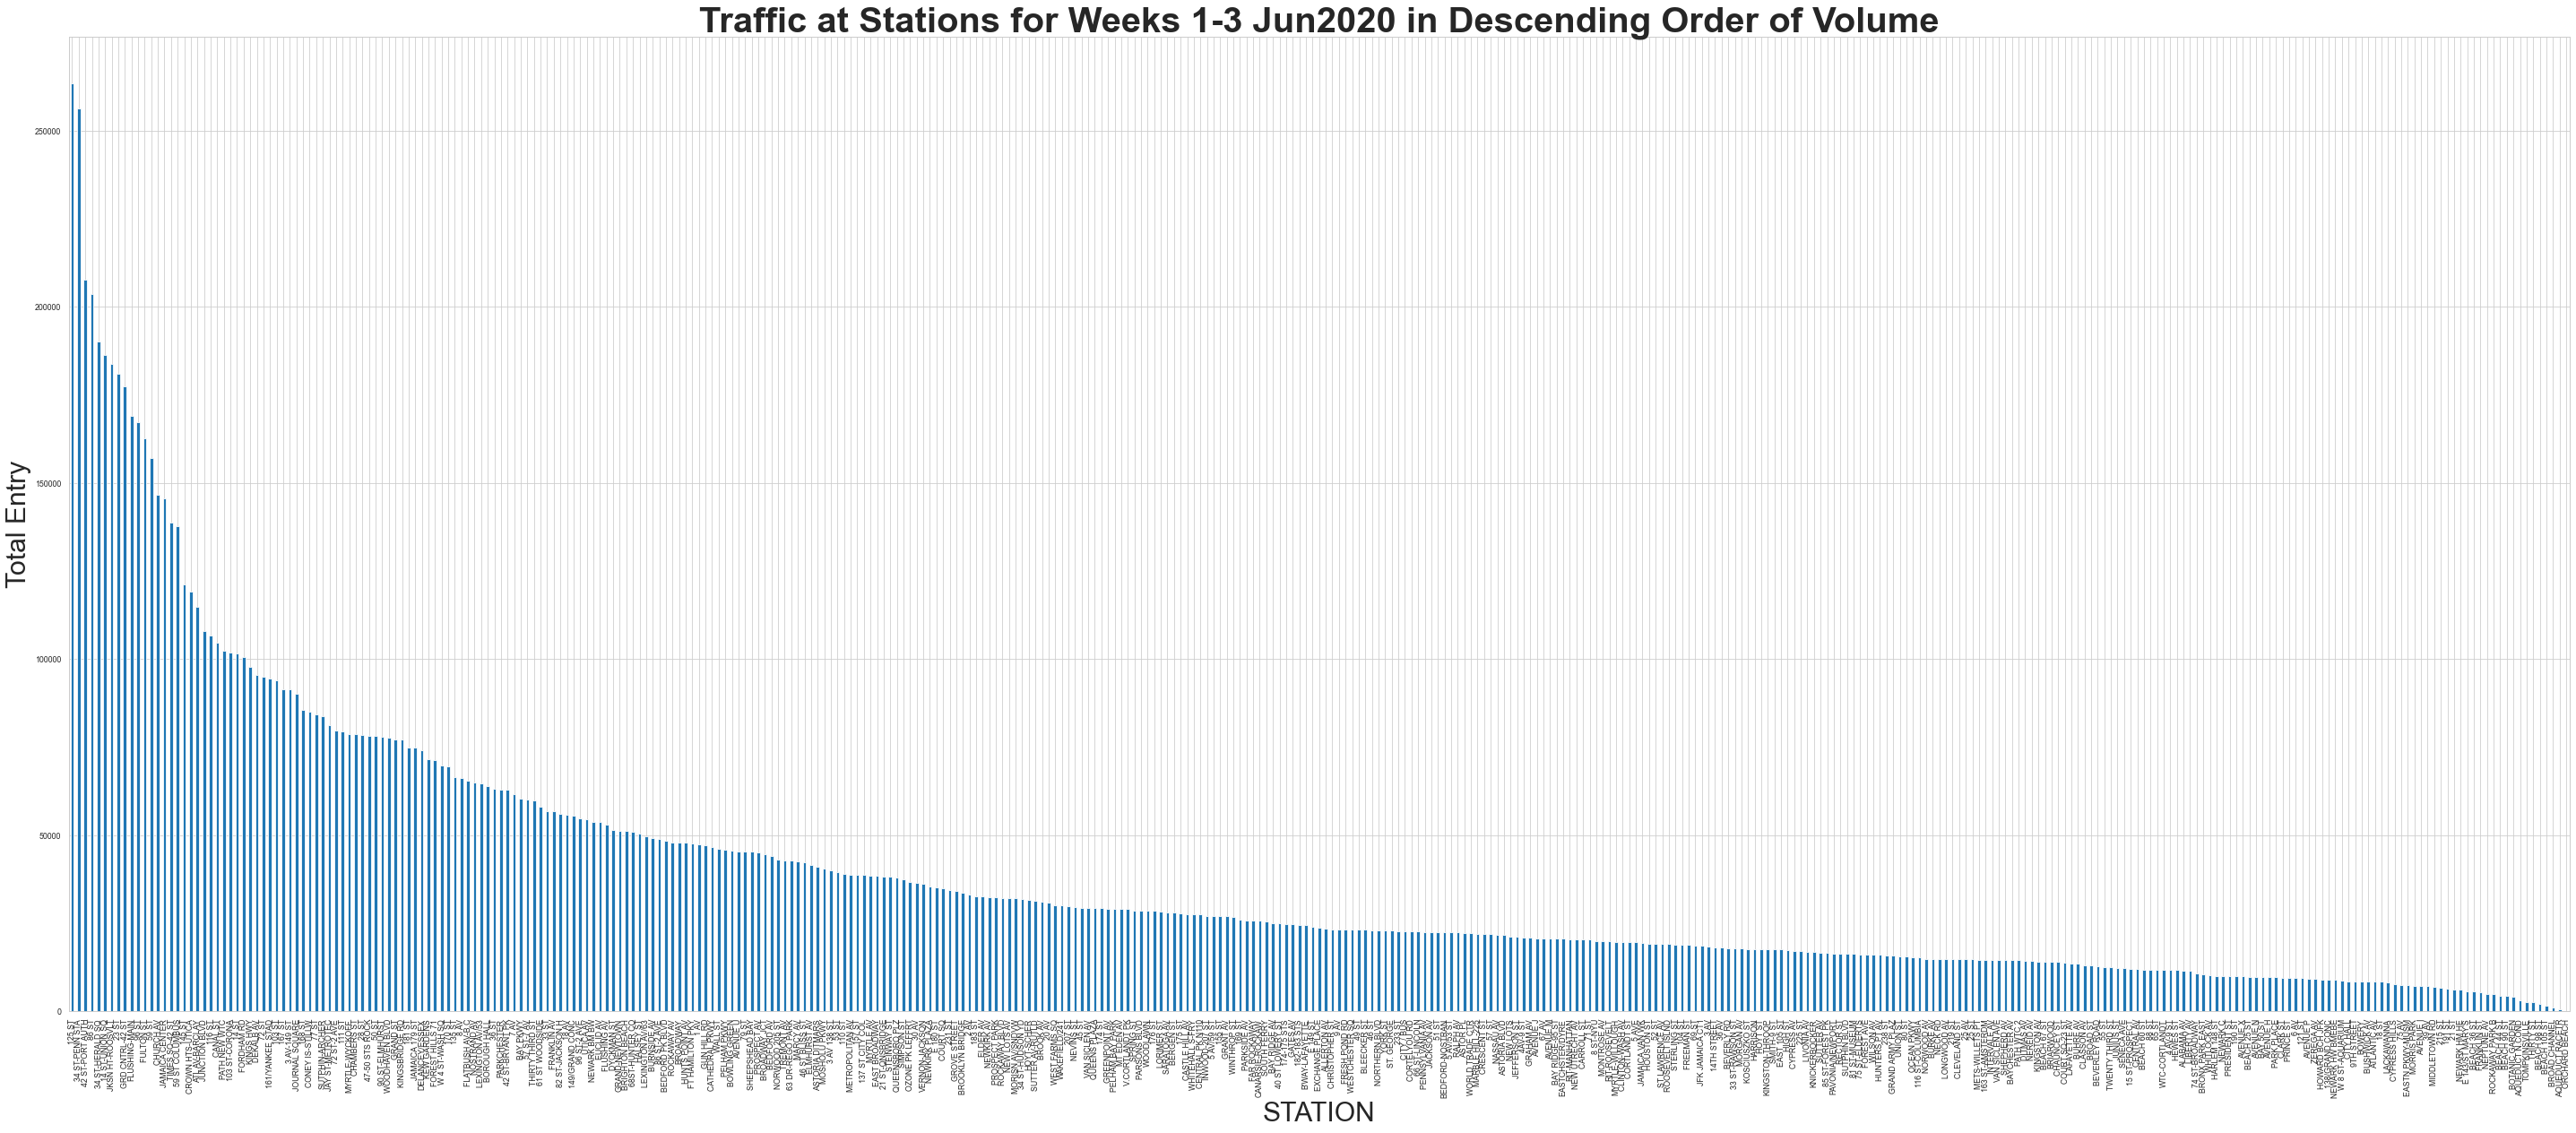

In [42]:
#plotting each station and its total traffic in descending order
plt.xlabel('Station', fontsize=30)
plt.ylabel('Total Entry', fontsize=30)
plt.title(
    'Traffic at Stations for Weeks 1-3 Jun2020 in Descending Order of Volume',
    fontsize=40,
    weight='bold')

(sorted_riders_perstation.plot(x='STATION',
                               y='DAILY_ENTRIES',
                               kind='bar',
                               figsize=(50, 20),
                               legend=False))

In [43]:
#finding the top 10 stations by total traffic
total_top_10_stations = sorted_riders_perstation.reset_index().head(10)
total_top_10_stations

STATION  DAILY_ENTRIES
0           125 ST       263462.0
1   34 ST-PENN STA       256182.0
2  42 ST-PORT AUTH       207645.0
3            86 ST       203688.0
4  34 ST-HERALD SQ       190229.0
5   14 ST-UNION SQ       186169.0
6  JKSN HT-ROOSVLT       183761.0
7            23 ST       180883.0
8  GRD CNTRL-42 ST       177389.0
9    FLUSHING-MAIN       169065.0

In [44]:
top_stations = (stations.groupby(
    ['STATION'])['DAILY_ENTRIES'].sum().reset_index().sort_values(
        by='DAILY_ENTRIES', ascending=False).STATION.head(10))
top_stations

9               125 ST
61      34 ST-PENN STA
68     42 ST-PORT AUTH
110              86 ST
59     34 ST-HERALD SQ
14      14 ST-UNION SQ
257    JKSN HT-ROOSVLT
46               23 ST
233    GRD CNTRL-42 ST
217      FLUSHING-MAIN
Name: STATION, dtype: object

In [45]:
#distribution of traffic for the top 10 stations
distribution_top_10_stations = stations[stations['STATION'].isin(top_stations)]
distribution_top_10_stations

STATION       DATE  DAILY_ENTRIES  DAY  WEEK_NUMBER
180            125 ST 2020-05-31         9350.0    6           22
181            125 ST 2020-06-01         7191.0    0           23
182            125 ST 2020-06-02        13847.0    1           23
183            125 ST 2020-06-03        13270.0    2           23
184            125 ST 2020-06-04        12954.0    3           23
...               ...        ...            ...  ...          ...
5152  JKSN HT-ROOSVLT 2020-06-15         6866.0    0           25
5153  JKSN HT-ROOSVLT 2020-06-16        11521.0    1           25
5154  JKSN HT-ROOSVLT 2020-06-17        11679.0    2           25
5155  JKSN HT-ROOSVLT 2020-06-18        11930.0    3           25
5156  JKSN HT-ROOSVLT 2020-06-19        11680.0    4           25

[200 rows x 5 columns]

Text(0.5, 1.0, 'Distribution of Traffic for Top 10 Stations')

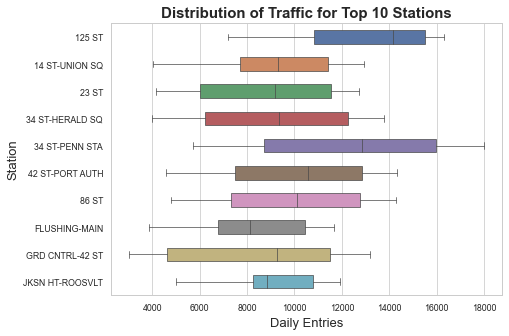

In [46]:
#boxplot of the distribution of traffic for top 10 stations
plt.figure(figsize=(7, 5))
b = sns.boxplot('DAILY_ENTRIES',
                'STATION',
                data=distribution_top_10_stations,
                width=0.5,
                linewidth=0.7,
                palette='deep')
b.set_ylabel('Station', fontsize=13)
b.set_xlabel('Daily Entries', fontsize=13)
b.axes.set_title('Distribution of Traffic for Top 10 Stations',
                 fontsize=15,
                 weight='bold')